___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [62]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline

import yfinance as yf
yf.pdr_override()

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [63]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [64]:
#Bank of America
BA = yf.download("BA", start, end)
#CitiGroup
C = yf.download("C", start, end)
#Goldman Sachs
GS = yf.download("GS", start, end)
#JPMorgan Chase
JPM = yf.download("JPM", start, end)
#Morgan Stanley
MS = yf.download("MS", start, end)
#Wells Fargo
WF = yf.download("WF", start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [65]:
df = yf.download(["BA", "C", "GS", "JPM", "MS", "WF"], start, end)

[*********************100%***********************]  6 of 6 completed


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [66]:
tickers = ["BA", "C", "GS", "JPM", "MS", "WF"]

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [67]:
bank_stocks = pd.concat([BA, C, GS, JPM, MS, WF], keys=tickers, axis=1)

** Set the column name levels (this is filled out for you):**

In [68]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [69]:
bank_stocks.head()

Bank Ticker         BA                                                       \
Stock Info        Open       High        Low      Close  Adj Close   Volume   
Date                                                                          
2006-01-03   70.400002  70.599998  69.330002  70.440002  50.119690  4943000   
2006-01-04   70.080002  71.269997  69.860001  71.169998  50.639084  3165000   
2006-01-05   70.550003  70.550003  69.580002  70.330002  50.041420  4598100   
2006-01-06   70.339996  70.500000  69.050003  69.349998  49.344131  4820000   
2006-01-09   69.279999  69.400002  68.660004  68.769997  48.931465  4567300   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                        WF                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.607506  5377000  72.705605  73.766388  72.228844   
2006-01-04   58.349998  34.631248  7977800  73.122765  74.719902  72.884384   
2006-01-05   58.509998  34.726204  5778000  73.003578  73.420738  72.526817   
2006-01-06   58.570000  34.761826  6889800  73.897499  76.769966  73.897499   
2006-01-09   59.189999  35.129784  4144500  74.493446  75.268173  74.195473   

Bank Ticker                               
Stock Info       Close  Adj Close Volume  
Date                                      
2006-01-03   72.884384  72.381088  23408  
2006-01-04   74.016685  73.505569  27268  
2006-01-05   72.669846  72.168030  11075  
2006-01-06   75.744934  75.221886  34819  
2006-01-09   74.195473  73.683121  30959  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [70]:
bank_stocks.xs(key="Close", axis=1, level="Stock Info").max()

Bank Ticker
BA     440.619995
C      564.099976
GS     423.850006
JPM    171.779999
MS     105.449997
WF      99.868889
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [71]:
returns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [72]:
for tick in tickers:
    returns[tick + " Return"] = bank_stocks[tick]["Close"].pct_change()
    
returns.head()

,BA Return,C Return,GS Return,JPM Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,0.010363,-0.018462,-0.013812,-0.014183,0.000686,0.015536
2006-01-05,-0.011803,0.004961,-0.000393,0.003029,0.002742,-0.018196
2006-01-06,-0.013934,0.000000,0.014169,0.007046,0.001025,0.042316
2006-01-09,-0.008363,-0.004731,0.012030,0.016242,0.010586,-0.020456


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

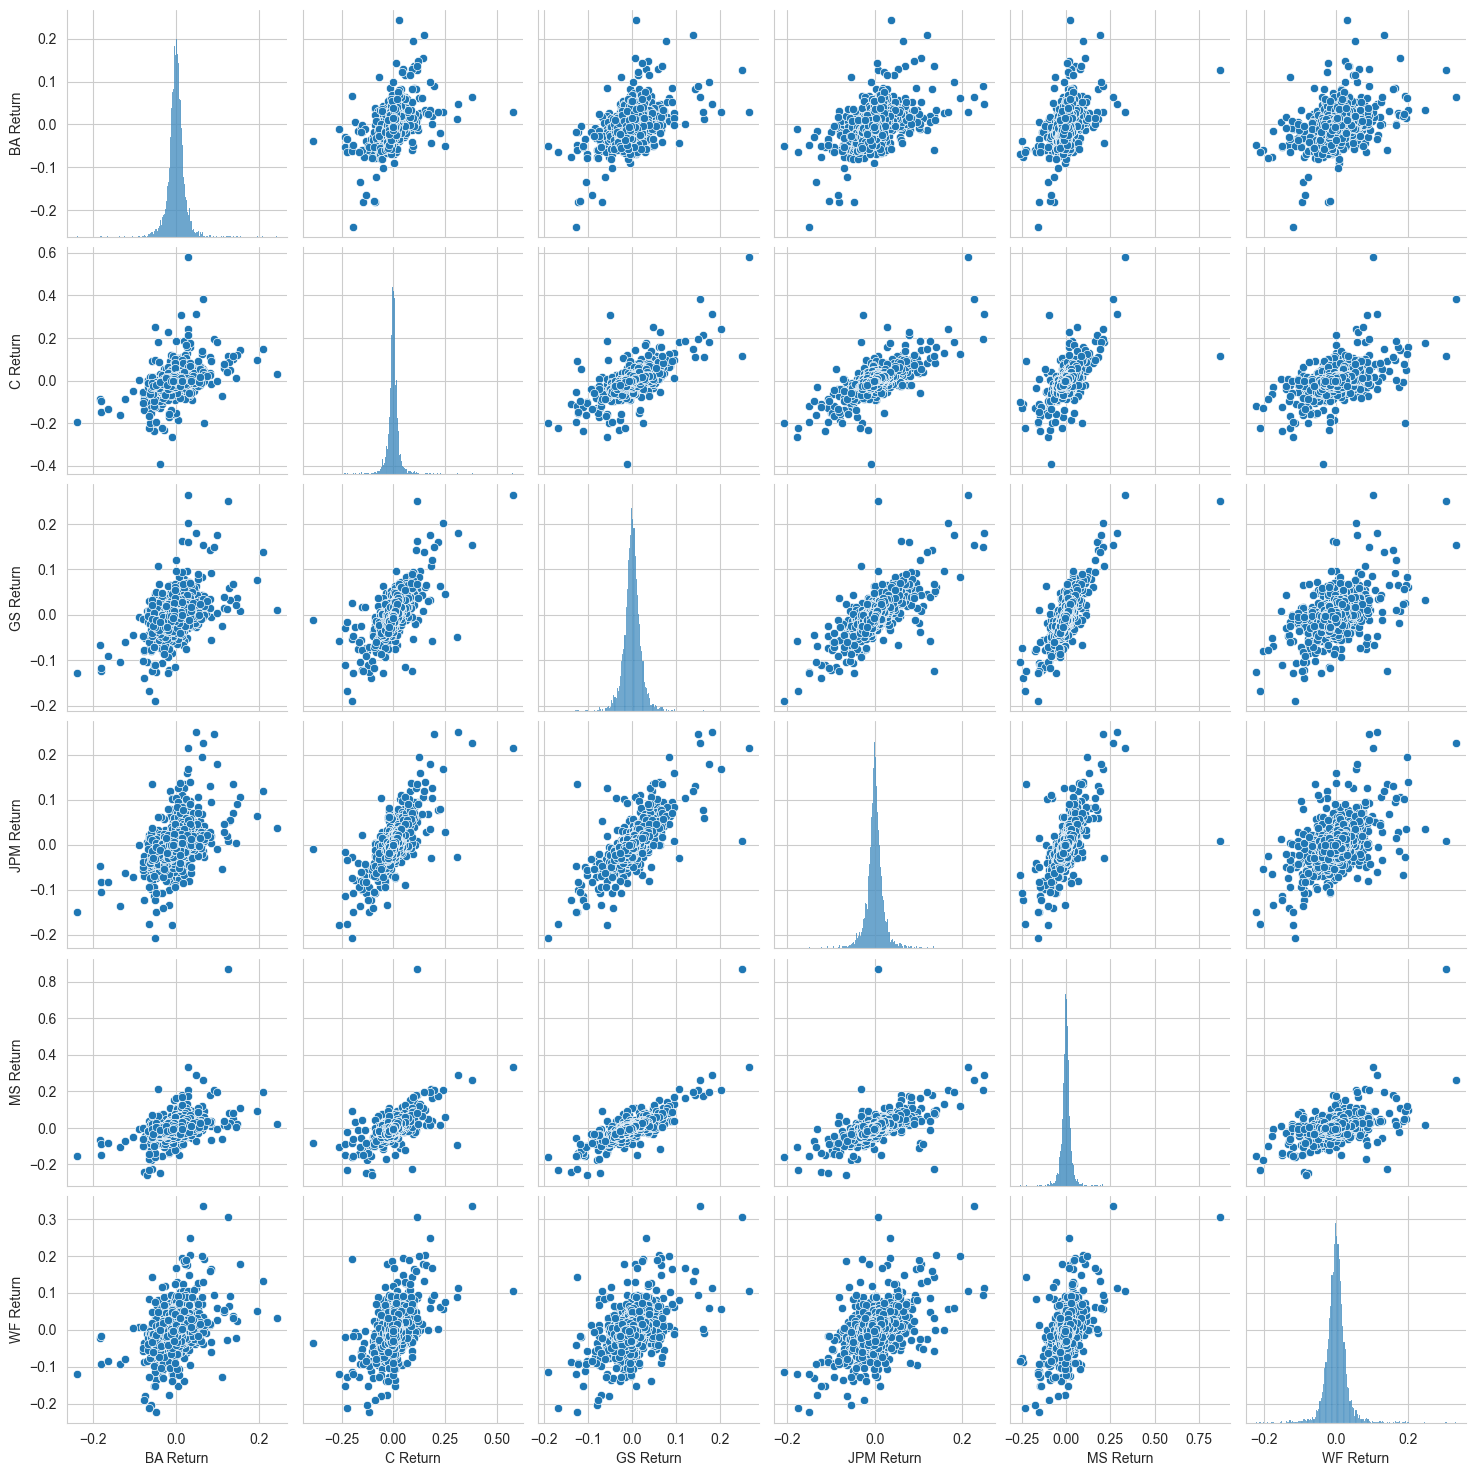

In [73]:
import seaborn as sb
sb.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [103]:
print(returns.idxmax())
print("\n")
print(returns.std())
print("\n")
print("The most riskiest happened at: ", returns.std().max())

BA Return    2020-03-25
C Return     2008-11-24
GS Return    2008-11-24
JPM Return   2009-01-21
MS Return    2008-10-13
WF Return    2009-03-10
dtype: datetime64[ns]


BA Return     0.022282
C Return      0.033556
GS Return     0.023327
JPM Return    0.024607
MS Return     0.032579
WF Return     0.030963
dtype: float64


The most riskiest happened at:  0.03355563542740679


** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [104]:
print(returns.idxmin())
print("\n")
print(returns.std())
print("\n")
print("The most unriskiest company is at: ", returns.std().min())

BA Return    2020-03-16
C Return     2009-02-27
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WF Return    2008-09-29
dtype: datetime64[ns]


BA Return     0.022282
C Return      0.033556
GS Return     0.023327
JPM Return    0.024607
MS Return     0.032579
WF Return     0.030963
dtype: float64


The most unriskiest company is at:  0.022282454725811734


** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [76]:
print(returns.std())
print("The most riskiest stock is at the Bank of America ", returns.std().max())

BA Return     0.022282
C Return      0.033556
GS Return     0.023327
JPM Return    0.024607
MS Return     0.032579
WF Return     0.030963
dtype: float64
The most riskiest stock is at the Bank of America  0.03355563542740679


In [90]:
print(returns.loc["2009-1-1" : "2009-12-31"].std())
print("The most riskiest company at the 2022 is: ", returns.loc["2009-1-1" : "2009-12-31"].std().max())

BA Return     0.025192
C Return      0.079363
GS Return     0.038187
JPM Return    0.051184
MS Return     0.051127
WF Return     0.056092
dtype: float64
The most riskiest company at the 2022 is:  0.07936250309911841


** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

C:\Users\hp\AppData\Local\Temp\ipykernel_12880\1955922815.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='BA Return', ylabel='Density'>

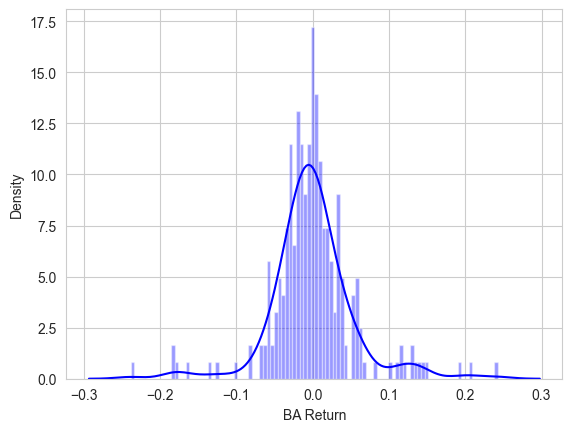

In [91]:
sb.distplot(returns.loc["2020-1-1" : "2020-12-31"]["BA Return"], color="blue", bins=100)

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

In [92]:
returns.loc["2008-1-1":"2008-12-31"].std()

BA Return     0.030281
C Return      0.073523
GS Return     0.050015
JPM Return    0.053134
MS Return     0.087604
WF Return     0.069076
dtype: float64

C:\Users\hp\AppData\Local\Temp\ipykernel_12880\2466903478.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='BA Return', ylabel='Density'>

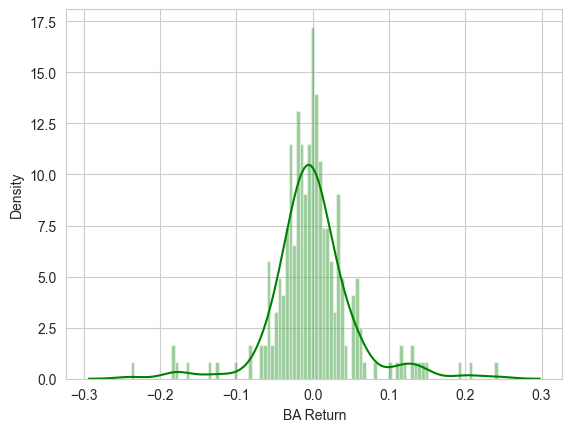

In [106]:
sb.distplot(returns.loc["2020-1-1":"2020-12-31"]["BA Return"], color="green", bins=100)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

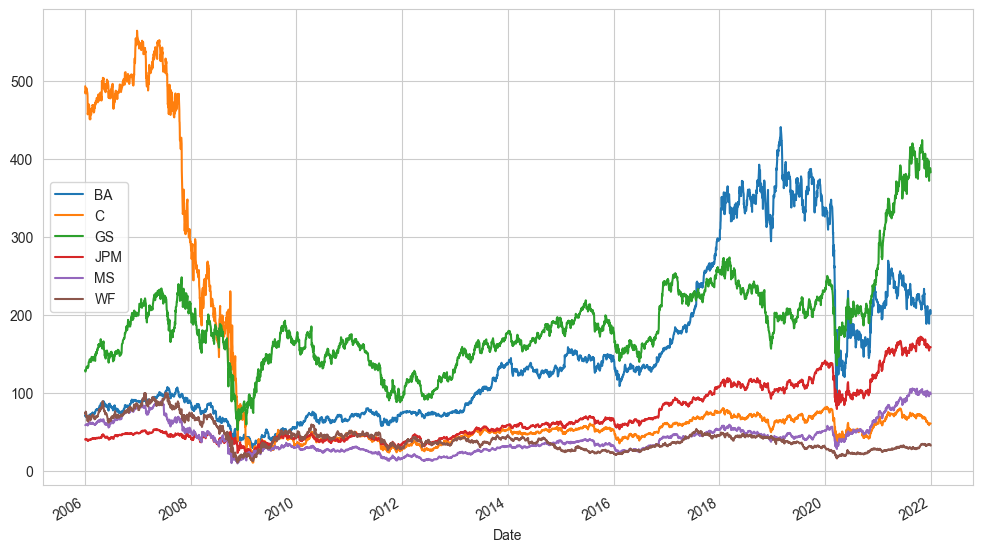

In [95]:
for tick in tickers:
    bank_stocks[tick]["Close"].plot(figsize=(12,7), label=tick)
    
plt.legend()

<AxesSubplot: xlabel='Date'>

<Figure size 1200x700 with 0 Axes>

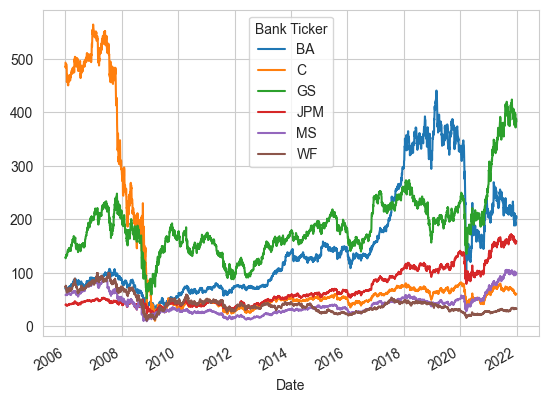

In [96]:
plt.figure(figsize=(12,7))
bank_stocks.xs(key="Close", axis=1, level="Stock Info").plot()

In [97]:
plt.figure(figsize=(12,7))
bank_stocks.xs(key="Close", axis=1, level="Stock Info").iplot()

<Figure size 1200x700 with 0 Axes>

C:\Users\hp\AppData\Local\Temp\ipykernel_12880\71388886.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='BA Return', ylabel='Density'>

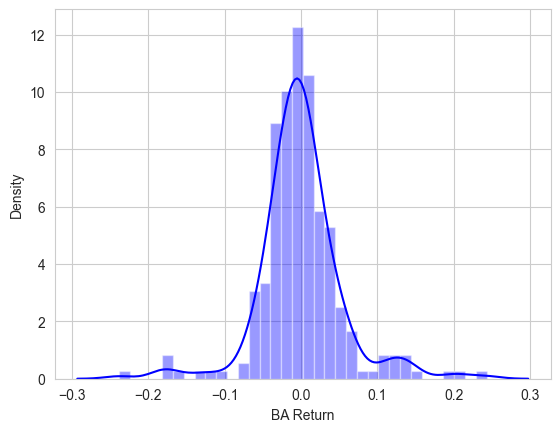

In [107]:
sb.distplot(returns.loc["2020-1-1" : "2020-12-31"]["BA Return"], color="blue")

C:\Users\hp\AppData\Local\Temp\ipykernel_12880\684275010.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<AxesSubplot: xlabel='C Return', ylabel='Density'>

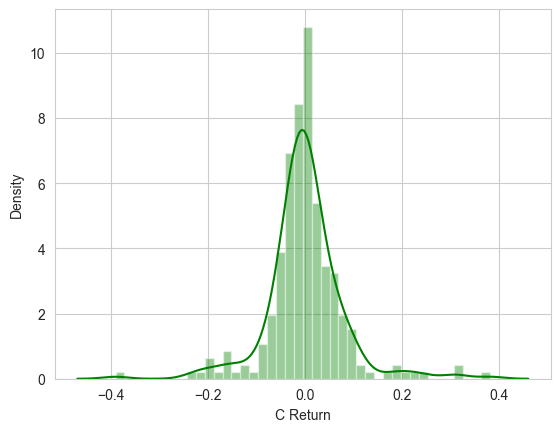

In [108]:
sb.distplot(returns.loc["2009-1-1" : "2009-12-31"]["C Return"], color="green")

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

<AxesSubplot: xlabel='Date'>

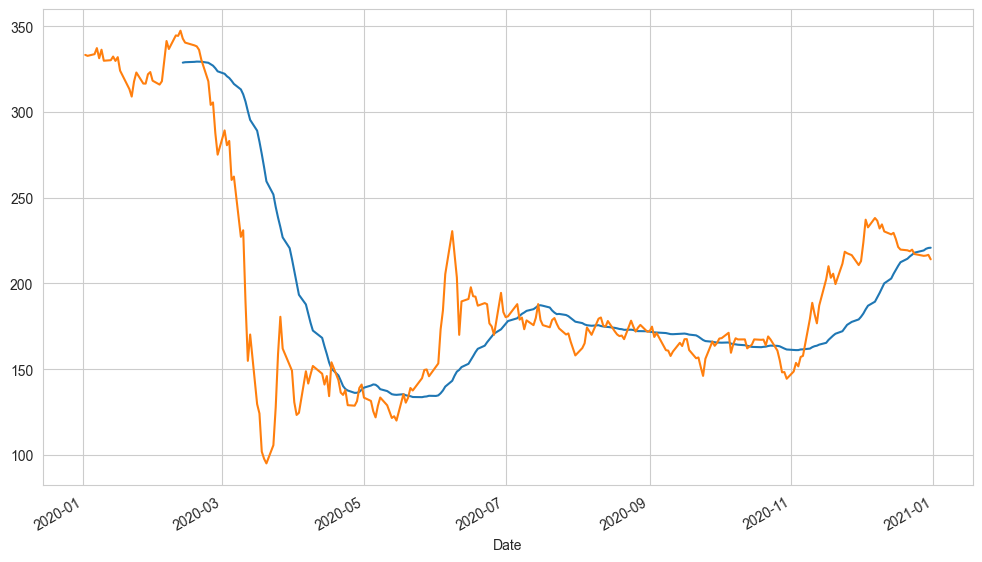

In [114]:
plt.figure(figsize=(12,7))
BA["Close"].loc["2020-1-1":"2020-12-31"].rolling(window=30).mean().plot(label="30 Day Average")
BA["Close"].loc["2020-1-1":"2020-12-31"].plot(label="BA Close Price")

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

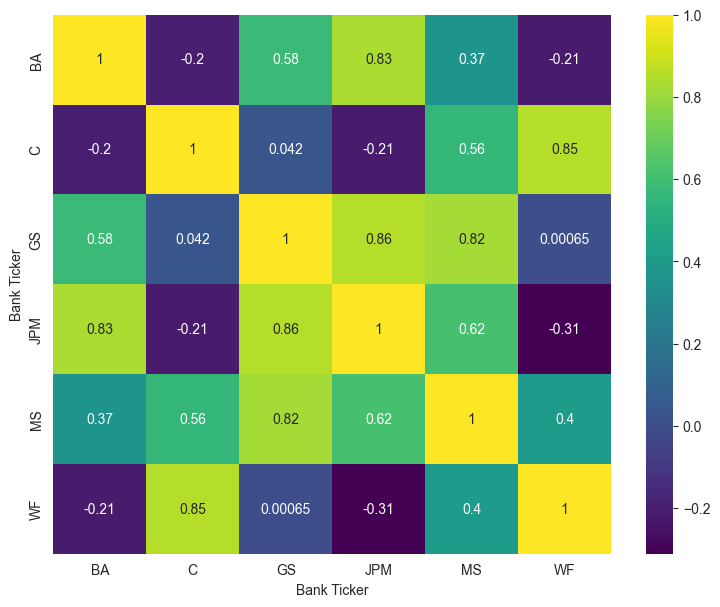

In [118]:
plt.figure(figsize=(9,7))
sb.heatmap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), annot=True, cmap="viridis")

** Optional: Use seaborn's clustermap to cluster the correlations together:**

<Figure size 900x700 with 0 Axes>

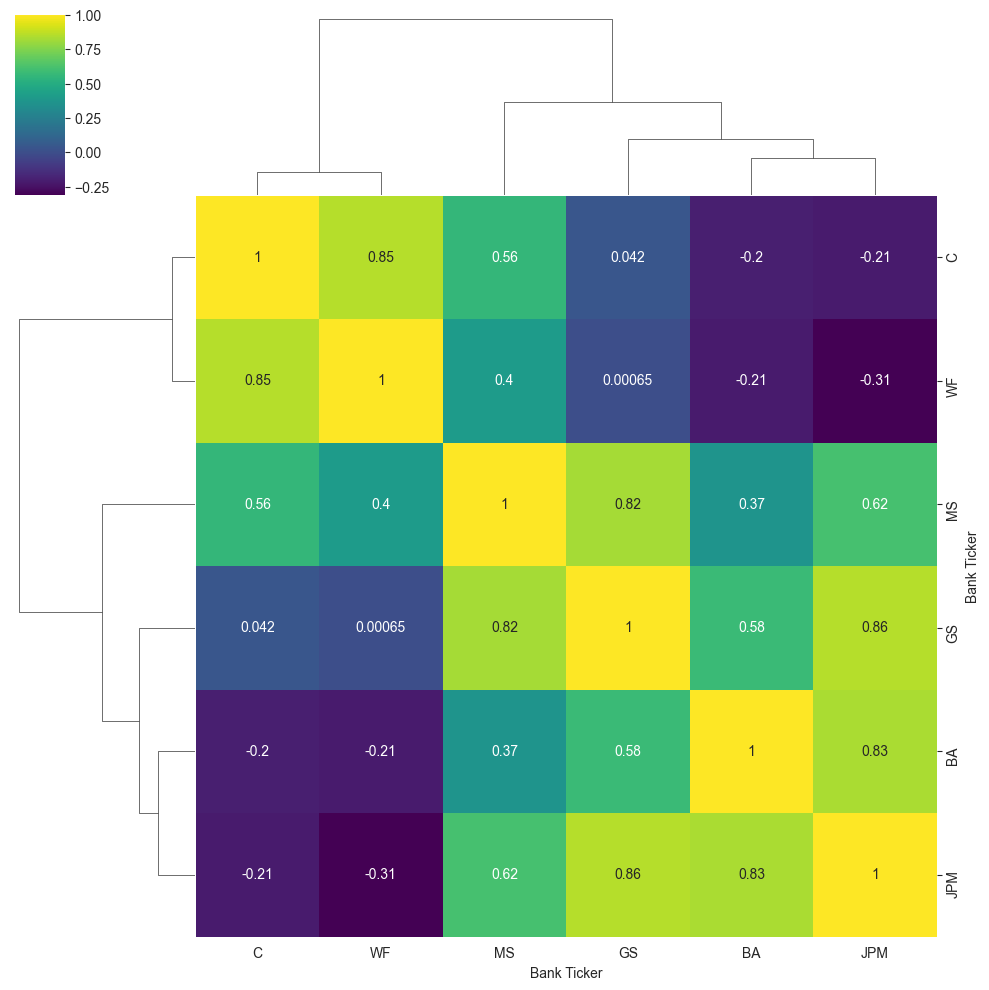

In [119]:
plt.figure(figsize=(9,7))
sb.clustermap(bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr(), annot=True, cmap="viridis")

In [124]:
plt.figure(figsize=(7,9))
bank_stocks.xs(key="Close", axis=1, level="Stock Info").corr().iplot(kind="heatmap", colorscale="rdylbu")

<Figure size 700x900 with 0 Axes>

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [127]:
#plt.figure(figsize=(8,8))
BA[["Open", "High", "Low", "Close"]].loc["2020-1-1":"2020-12-31"].iplot(kind="candle")

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [130]:
C["Close"].loc["2008-1-1":"2009-12-31"].ta_plot(study="sma", periods=[13,21,55], title="Simple Moving Average")

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [131]:
C["Close"].loc["2008-1-1":"2009-12-31"].ta_plot(study="boll", periods=[13,21,55], title="Simple Moving Average")

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.